# Demonstration of a Fourier series representation of a symmectric rectangular pulse train

This demo is supposed to visualize the [Fourier series](https://en.wikipedia.org/wiki/Fourier_series) representation of a periodic [rectangular pulse](https://en.wikipedia.org/wiki/Rectangular_function) train (or [square wave](https://en.wikipedia.org/wiki/Square_wave) ). 

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on signals and systems hold at the [university of applied sciences, Berlin](https://www.htw-berlin.de/).

## Import libararies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

%config InlineBackend.figure_format = 'svg'
plt.style.use('noelle.mplstyle')

## Formal definition of the Fourier series

A [periodic](https://en.wikipedia.org/wiki/Periodic_function), continuous time signal can be represented by a [linear combination](https://en.wikipedia.org/wiki/Linear_combination) of an infinite number of [complex exponential signals](./exponential_signals.ipynb). This linear combination is formally given by

$$x(t)=\sum_{k=-\infty}^{\infty}X[k]\cdot\text{e}^{jk\omega_0t},$$

and it is called [Fourier series](https://en.wikipedia.org/wiki/Fourier_series). The complex coefficients $X[k]$ are called Fourier coefficients and they represent the amplitudes and phases of the individual involved exponential signals (or harmonic oscillations). 

## Example: Plot signal from lecture and the decompsition of this signal into harmonic oszillations

The periodic signal known from the lecture is decomposed into its individual harmonics...
interactive: number of harmonics for plotting can be specified...

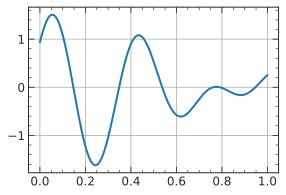

In [2]:
sr = 1e3
t = np.linspace(0, 1-1/sr, int(sr))
f = np.fft.fftshift(np.fft.fftfreq(np.size(t), 1/sr))
w0 = 2 * np.pi

x = ((np.sin(4*np.pi*1.5*t) + np.sin(2*np.pi*2.1*t + 1.5))* np.exp(-t))
x = x - np.mean(x)

X = np.fft.fft(x)

nOszillations = 10
oszillations = np.zeros((np.size(t),nOszillations))
for oszillation in np.arange(nOszillations):
    oszillations[:, oszillation] = np.real(np.abs(X[oszillation]) * np.exp(1j * oszillation * w0 * t + np.angle(X[oszillation])))
    
plt.plot(t, x)
plt.show()
#plt.plot(t, oszillations, t, np.sum(oszillations, axis=-1))
#plt.show()

## Example: periodic rectangular time signal

When considering only a linear combination of a finite number of ($N$) exponentials, the periodic time signal can only be approximated. A very intuitive domonsration of such an approximation is shown in this [Youtube video](https://www.youtube.com/watch?x-yt-ts=1421914688&v=LznjC4Lo7lE&x-yt-cl=84503534). This principle is also shown in the following interactive simulation: a periodic [rectangular funtion](https://en.wikipedia.org/wiki/Rectangular_function) with variable pulse ($T_0$) width and periodicity ($T$) is approximated by a variable number ($N$) of oscillations. Both, the original function as well as the approximation is plotted. Further, also the magnitudes (absolute values) of the involved Fourier coefficients, and therewith the magnitues of the oscillations are shown.

In [3]:
def fSeries(T0=1, T=2, N=5):
    """Calc Fourier series coefficients of a periodic, symmetric rectangular pulse train
    and plot them.
    
    N number of harminics to include
    T0 width of the individual rect pulses
    T period of rect pulse train
    """

    duration = 5
    dutyCycle = T0/T
    f0 = 1/T
    w0 = 2 * np.pi * f0

    sr = 500
    t = np.arange(0, duration, 1/sr)
    
    rect = np.zeros_like(t)
    rect[np.mod(t, T) <= T0/2] = 1
    rect[np.mod(t, T) >= T-T0/2] = 1

    approx = 1j * np.zeros_like(rect)
    freqs = np.arange(-N + 1, N)
    X = 1j * np.zeros_like(freqs)
    
    for i, freq in enumerate(freqs):
        X[i] = dutyCycle * np.sinc(freq * dutyCycle)
        approx += X[i] * np.exp(1j * freq * w0 * t)        
    
    n_row = 1
    n_col = 2
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig = plt.figure(figsize=fig_size)
    
    ax = fig.add_subplot(n_row, n_col, 1)
    ax.plot(t, rect, t, np.real(approx))
    ax.text(0.5, 1.2, 'duty cycle: %1.2f, N: %d' %(dutyCycle, N))
    ax.set(xlabel='time / s', ylim=(-0.3, 1.3), ylabel='x(t)')    
    
    ax = fig.add_subplot(n_row, n_col, 2)
    ax.stem(freqs, np.abs(X))        
    ax.set(xlabel='k', ylim=(0, np.max(np.abs(X)) * 1.1), ylabel='|X[k]|')
    
    plt.tight_layout()
    plt.show()
    
style = {'description_width': '40%'}
w_T0 = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1.0, continuous_update=False, description=r'width $\left(T_0\right)$:', style=style)
w_T = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2.0, continuous_update=False, description=r'periodicity $\left(T\right)$:', style=style)
w_N = widgets.IntSlider(min=1, max=99, step=1, value=5, continuous_update=False, description=r'no. oscillations $\left(N\right)$:', style=style)

ui = widgets.HBox([w_T0, w_T, w_N])

out = widgets.interactive_output(fSeries, {'T0':w_T0, 'T':w_T, 'N':w_N})
out.layout.height = '300px'

display(ui, out)

Output(layout=Layout(height='300px'))